# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-10 Mini-batch Gradient Descent Method

PA 3-10에서는 n개의 data sample을 이용하여 $\theta$를 학습시키는 Mini-batch Gradient Descent Method(이하 MGDM)를 구현합니다.

이때 n을 mini-batch size또는 batch size라고 부르고, dataset 전체를 이용하는 batch gradient descent method와 마찬가지로,  
cost를 이용하여 $\theta$를 학습시킵니다.


이때 SGDM과 마찬가지로 MGDM에도 with replacment, without replacement를 적용할 수 있습니다.  
따라서 batch를 만들어주는 함수를 구현하는 과정을 포함하여 PA 3-10은 다음과 같은 단계로 진행됩니다.

<ul>
    <li> Step.1 Batch Extraction </li>
    <li> Step.2 MGDM without Replacement </li>
    <li> Step.3 MGDM with Replacement </li>
</ul>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)



PA 3-09와 마찬가지로 default dataset을 만들고,  
PA 3-08과 같이 model과 mean_node를 이용한 cost function을 구현하세요.

In [3]:
##### Start Your Code(Dataset Preparation) #####
data_gen = LR_dataset_generator(feature_dim = 1)
dataset = data_gen.make_dataset()
##### End Your Code(Dataset Preparation) #####

##### Start Your Code(Model/Cost Implementation) #####
node1 = nodes.mul_node()
node2 = nodes.minus_node()
node3 = nodes.square_node()
node4 = nodes.mean_node()
##### End Your Code(Model/Cost Implementation) #####

***
## Step.1 Batch Extraction

batch size를 argument로 입력받아 mini-batch를 return해주는 get_data_batch 함수를 구현합니다.

이때 전체 dataset에 들어있는 data sample의 개수가 batch size로 나누어 떨어지지 않는 경우를 표현하면 다음과 같습니다.
<img src='./imgs/3_10_01.png' width=800>
즉, 마지막 mini-batch에 대해서는 위와 같이 구현해줍니다.

***
**Programming**  
위의 내용을 바탕으로 get_data_batch 함수를 구현하세요.  
이 함수의 input/output은 다음과 같습니다.
- INPUT : dataset, batch index
- OUTPUT : mini-batch

In [4]:
def get_data_batch(dataset, batch_idx):
    ##### Start Your Code(Batch Extraction) #####
    if batch_idx is n_batch -1:
        batch = dataset[batch_idx*batch_size:]
    else:
        batch = dataset[batch_idx*batch_size : (batch_idx+1)*batch_size]
    ##### End Your Code(Batch Extraction) #####
    return batch

그리고 batch의 개수를 구하는 과정은 다음과 같습니다.

전체 data sample의 개수가 mini-batch size로 나누어 떨어지지 않는 경우를 위해 다음과 같이 mini-batch의 개수는 ceiling을 이용하여 구합니다.

In [8]:
batch_size = 16

print("# data sample : ", dataset.shape[0])
print("(# data sample)/(Batch Size) : ", dataset.shape[0]/batch_size)
print("After ceiling : ", int(np.ceil(dataset.shape[0]/batch_size)))

# data sample :  100
(# data sample)/(Batch Size) :  6.25
After ceiling :  7


***
## Step.2 MGDM without Replacement

PA 3-09와 마찬가지로 replacement를 하지 않는 MGDM는 for loop을 이용하여 학습을 진행합니다.  
다만 달라지는 점은 data sample에 접근하는 것이 아니라 for loop을 통해 batch index를 이용한다는 점입니다.

위의 mini-batch 그림을 참고하면 전체 mini-batch의 개수만큼 for loop이 돌고, 각 for loop에서는 batch index를 이용하게 됩니다.

***
**Programming**  
get_data_batch 함수와 PA 3-08의 코드를 참고하여 replacement가 없는 MGDM을 구현하세요.  
이때 학습조건은 다음과 같습니다.
- initial theta = 0.1
- learning rate = 0.01
- total epoch = 20
- batch size = 8

Text(0.5, 1.0, '$\\mathcal{L}$')

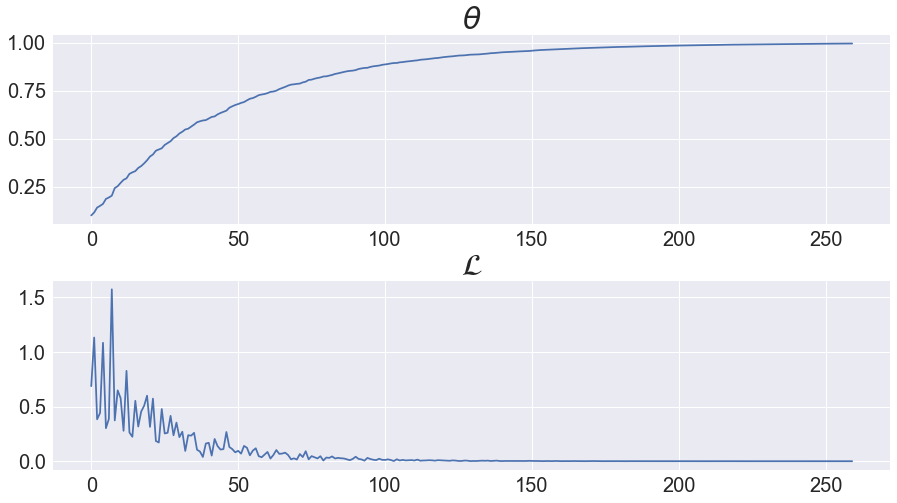

In [18]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
epochs = 20

batch_size = 8
n_batch = int(np.ceil(dataset.shape[0]/batch_size))
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for epoch in range(epochs):
    ##### Start Your Code(Random Shuffling) #####
    np.random.shuffle(dataset)
    ##### Start Your Code(Random Shuffling) #####
    
    ##### Start Your Code(MGDM without Replacement) #####
    for batch_idx in range(n_batch):
        batch = get_data_batch(dataset, batch_idx)
        X, Y = batch[:,1], batch[:,-1]
        
        Z1 = node1.forward(th, X)
        Z2 = node2.forward(Y, Z1)
        Z3 = node3.forward(Z2)
        J = node4.forward(Z3)
        dZ3 = node4.backward(1)
        dZ2 = node3.backward(dZ3)
        dY, dZ1 = node2.backward(dZ2)
        dTh, dX = node1.backward(dZ1)

        th_list.append(th)
        loss_list.append(J)

        th = th - lr*np.sum(dTh)
    ##### Start Your Code(MGDM without Replacement) #####

fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

***
## Step.3 MGDM with Replacement

replacement를 이용하는 MGDM은 PA 3-09와 마찬가지로 random sampling을 이용하여 mini-batch를 뽑습니다.

이때 달라지는 점은 random choice의 size입니다.
그리고 PA 3-09와 마찬가지로 epoch보단 iteration이라는 표현이 더 적절합니다.

***
**Programming**  
다음 조건에서 replacement를 이용하는 MGDM을 구현하세요.
- initial theta = 0.1
- learning rate = 0.01
- batch size = 8
- total iteration = 500


Text(0.5, 1.0, '$\\mathcal{L}$')

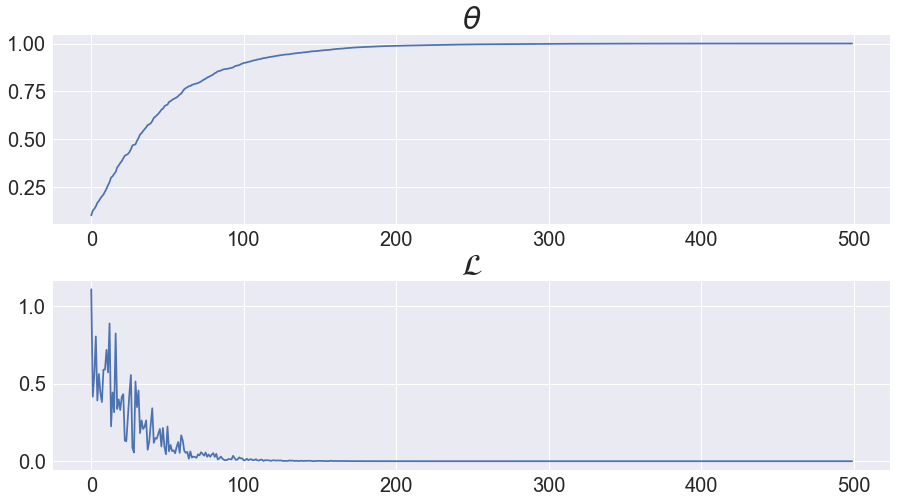

In [17]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01

batch_size = 8
iterations = 500
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for iteration in range(iterations):
    ##### Start Your Code(Random Sampling) #####
    idx = np.arange(dataset.shape[0])
    random_idx = np.random.choice(idx, batch_size)
    X, Y = dataset[random_idx,1], dataset[random_idx,2]
    ##### Start Your Code(Random Sampling) #####
    
    
    ##### Start Your Code(MGDM with Replacement) #####
    Z1 = node1.forward(th, X)
    Z2 = node2.forward(Y, Z1)
    Z3 = node3.forward(Z2)
    J = node4.forward(Z3)
    
    dZ3 = node4.backward(1)
    dZ2 = node3.backward(dZ3)
    dY, dZ1 = node2.backward(dZ2)
    dTh, dX = node1.backward(dZ1)

    th_list.append(th)
    loss_list.append(J)

    th = th - lr*np.sum(dTh)
    ##### Start Your Code(MGDM with Replacement) #####
    
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)